# Fake Banknote detection

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

## Data Exploratory

In [2]:
df = pd.read_csv('banknotes.csv')

display(df.info())
display(df.head())
display(df.describe())

display(df['class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variace     1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


None

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


,variace,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


0    762
1    610
Name: class, dtype: int64

/home/dangkhoa/.conda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/dangkhoa/.conda/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/dangkhoa/.conda/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


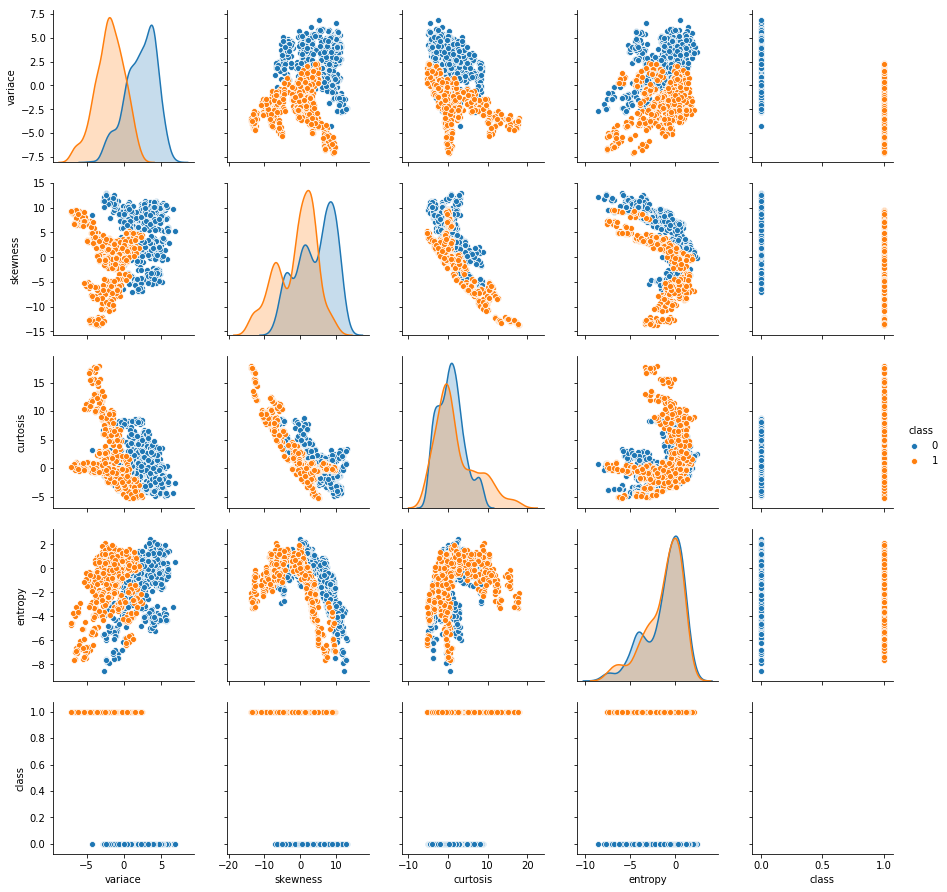

In [3]:
sns.pairplot(df, hue="class")

## Training data

In [4]:
from sklearn.preprocessing import scale

X = scale(df.drop('class', axis=1).values)
y = df['class'].values

display(X.shape)
display(y.shape)

(1372, 4)

(1372,)

## Baseline model  - Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()
cross_val_score(model, X, y)

/home/dangkhoa/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


array([0.99563319, 0.98468271, 0.99781182])

## Logistic Regression Model

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3, random_state=42)

In [7]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

K.clear_session()

model = Sequential()

model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(
    X_train, y_train,
    epochs=10, validation_split=0.2, verbose=2)

Train on 768 samples, validate on 192 samples
Epoch 1/10
 - 1s - loss: 0.6953 - acc: 0.5599 - val_loss: 0.7042 - val_acc: 0.5469
Epoch 2/10
 - 0s - loss: 0.6637 - acc: 0.5898 - val_loss: 0.6752 - val_acc: 0.5781
Epoch 3/10
 - 0s - loss: 0.6354 - acc: 0.6276 - val_loss: 0.6491 - val_acc: 0.6042
Epoch 4/10
 - 0s - loss: 0.6100 - acc: 0.6628 - val_loss: 0.6256 - val_acc: 0.6198
Epoch 5/10
 - 0s - loss: 0.5872 - acc: 0.6810 - val_loss: 0.6043 - val_acc: 0.6406
Epoch 6/10
 - 0s - loss: 0.5667 - acc: 0.7044 - val_loss: 0.5850 - val_acc: 0.6458
Epoch 7/10
 - 0s - loss: 0.5482 - acc: 0.7135 - val_loss: 0.5674 - val_acc: 0.6771
Epoch 8/10
 - 0s - loss: 0.5315 - acc: 0.7396 - val_loss: 0.5514 - val_acc: 0.7083
Epoch 9/10
 - 0s - loss: 0.5163 - acc: 0.7565 - val_loss: 0.5367 - val_acc: 0.7240
Epoch 10/10
 - 0s - loss: 0.5023 - acc: 0.7708 - val_loss: 0.5232 - val_acc: 0.7448


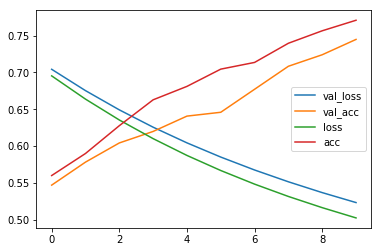

In [9]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot();

In [10]:
result = model.evaluate(X_test, y_test)

print("Test accuracy: {:3.1f} %".format(result[1]*100))

412/412 [==============================] - 0s 28us/step
Test accuracy: 77.7 %


## Logistic Regression Model - Customize learning rate
$$w' = w - \alpha \frac{\partial f}{\partial w}$$

- $\alpha$ = learning rate
    + small: tiny step toward optimal point
    <img src="Figs/7.jpg" alt="Drawing" style="width: 300px;"/>

    + large: overshoot
    <img src="Figs/8.jpg" alt="Drawing" style="width: 300px;"/>

In [11]:
dflist = []
test_acc = {}

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:
    # Model
    K.clear_session()

    model = Sequential()
    
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])

    # Train
    h = model.fit(
        X_train, y_train,
        epochs=10, validation_split=0.2,
        batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))
    
    # Test
    res = model.evaluate(X_test, y_test)
    test_acc[str(lr)] = res[1]*100

412/412 [==============================] - 0s 33us/step


In [12]:
historydf = pd.concat(dflist, axis=1)
display(historydf.head())

metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product(
    [learning_rates, metrics_reported],
    names=['learning_rate', 'metric'])

historydf.columns = idx
display(historydf.head())

,val_loss,val_acc,loss,acc,val_loss,val_acc,loss,acc,val_loss,val_acc,loss,acc,val_loss,val_acc,loss,acc
0,0.899136,0.401042,0.945602,0.391927,0.468669,0.786458,0.490936,0.742188,0.379952,0.859375,0.489908,0.781250,0.147898,0.973958,0.236485,0.947917
1,0.807987,0.447917,0.837961,0.445312,0.398385,0.833333,0.412744,0.815104,0.293108,0.906250,0.321390,0.882812,0.100721,0.989583,0.133656,0.963542
2,0.733072,0.494792,0.750320,0.486979,0.345951,0.854167,0.356850,0.861979,0.240602,0.947917,0.260591,0.921875,0.079914,0.989583,0.104482,0.966146
3,0.671927,0.546875,0.679682,0.544271,0.305383,0.885417,0.314597,0.877604,0.204621,0.958333,0.221649,0.944010,0.067836,0.989583,0.089684,0.973958
4,0.622114,0.578125,0.622884,0.619792,0.273081,0.927083,0.281721,0.906250,0.178499,0.973958,0.194405,0.955729,0.060091,0.989583,0.080352,0.973958


learning_rate      0.01                                    0.05            \
metric         val_loss   val_acc      loss       acc  val_loss   val_acc   
0              0.899136  0.401042  0.945602  0.391927  0.468669  0.786458   
1              0.807987  0.447917  0.837961  0.445312  0.398385  0.833333   
2              0.733072  0.494792  0.750320  0.486979  0.345951  0.854167   
3              0.671927  0.546875  0.679682  0.544271  0.305383  0.885417   
4              0.622114  0.578125  0.622884  0.619792  0.273081  0.927083   

learning_rate                          0.10                                \
metric             loss       acc  val_loss   val_acc      loss       acc   
0              0.490936  0.742188  0.379952  0.859375  0.489908  0.781250   
1              0.412744  0.815104  0.293108  0.906250  0.321390  0.882812   
2              0.356850  0.861979  0.240602  0.947917  0.260591  0.921875   
3              0.314597  0.877604  0.204621  0.958333  0.221649  0.944010   
4              0.281721  0.906250  0.178499  0.973958  0.194405  0.955729   

learning_rate      0.50                                
metric         val_loss   val_acc      loss       acc  
0              0.147898  0.973958  0.236485  0.947917  
1              0.100721  0.989583  0.133656  0.963542  
2              0.079914  0.989583  0.104482  0.966146  
3              0.067836  0.989583  0.089684  0.973958  
4              0.060091  0.989583  0.080352  0.973958

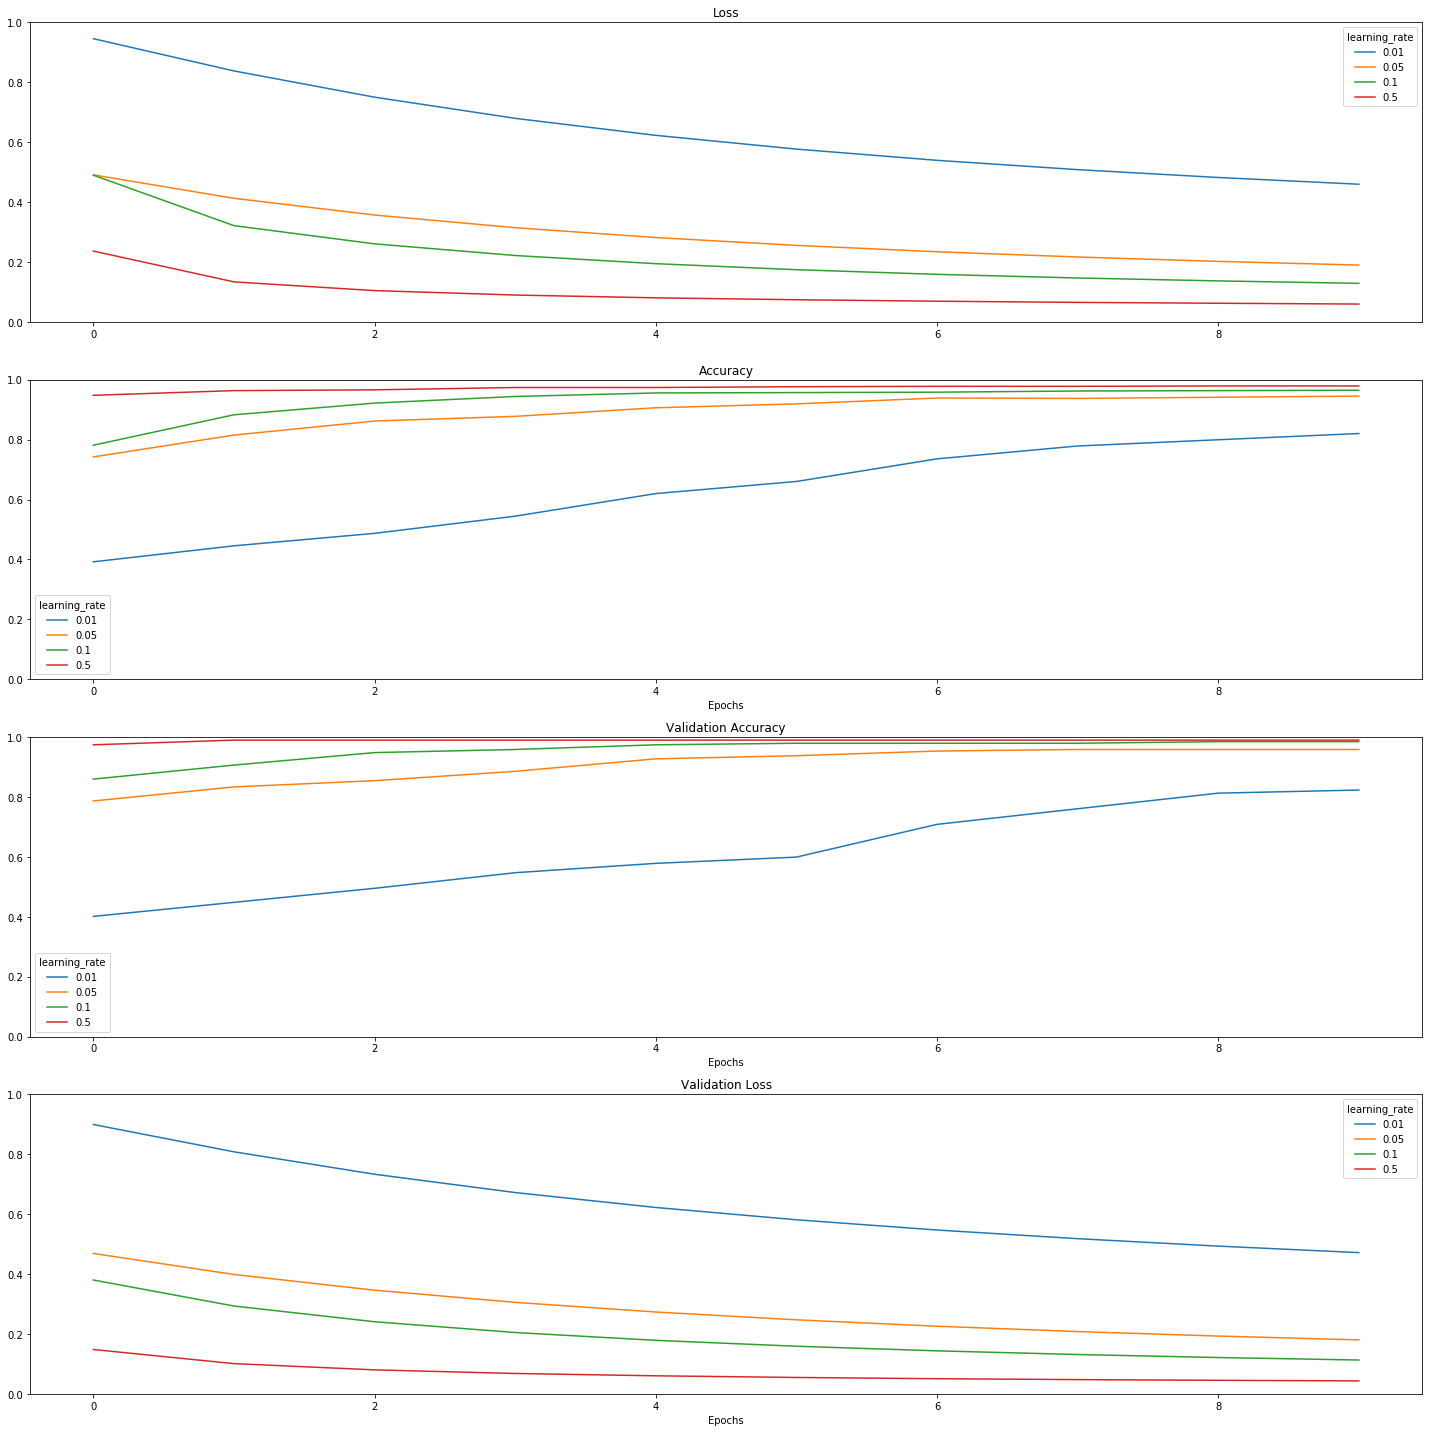

In [13]:
ax = plt.subplot(411)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax, figsize=(20,20))
plt.title("Loss")

ax = plt.subplot(412)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

ax = plt.subplot(413)
historydf.xs('val_acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Validation Accuracy")
plt.xlabel("Epochs")

ax = plt.subplot(414)
historydf.xs('val_loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Validation Loss")
plt.xlabel("Epochs")


plt.tight_layout()

In [14]:
for key, val in test_acc.items():
    print('Learning rate %s - Test accuracy = %0.2f' % (key, val))

Learning rate 0.01 - Test accuracy = 80.10
Learning rate 0.05 - Test accuracy = 96.36
Learning rate 0.1 - Test accuracy = 97.82
Learning rate 0.5 - Test accuracy = 98.06


## Logistic Regression Model - Customize batch size
- Gradient Descent
    + 1 epoch train the whole dataset
    
- Stochastic Gradient Descent (SGD)
   + 1 epoch train the 1 datapoint
   
- Mini-batch Gradient Descent
   + 1 epoch train the a subset of dataset (16, 32, 128, 256... datapoints)
   + small batch size: speedup training, noisy gradient, slow convergence
   + large batch size: slow training, less noisy
<img src="Figs/9.jpg" alt="Drawing" style="width: 300px;"/>

In [15]:
dflist = []
test_acc = {}

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    # model
    K.clear_session()

    model = Sequential()

    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    
    # Train
    h = model.fit(
        X_train, y_train,
        epochs=10, validation_split=0.2,
        batch_size=batch_size,
        verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))
    
    # Test
    res = model.evaluate(X_test, y_test)
    test_acc[str(batch_size)] = res[1]*100

412/412 [==============================] - 0s 28us/step


In [16]:
historydf = pd.concat(dflist, axis=1)
display(historydf.head())

metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product(
    [batch_sizes, metrics_reported],
    names=['batch_size', 'metric'])

historydf.columns = idx
display(historydf.head())

,val_loss,val_acc,loss,acc,val_loss,val_acc,loss,acc,val_loss,val_acc,loss,acc,val_loss,val_acc,loss,acc
0,0.337324,0.932292,0.345181,0.908854,0.587917,0.640625,0.589754,0.630208,0.378332,0.947917,0.395960,0.907552,0.811264,0.187500,0.837399,0.187500
1,0.321669,0.932292,0.327594,0.911458,0.561574,0.666667,0.561254,0.651042,0.368091,0.947917,0.384176,0.921875,0.795347,0.192708,0.819040,0.194010
2,0.308433,0.932292,0.313008,0.916667,0.537993,0.677083,0.535810,0.678385,0.358787,0.958333,0.373503,0.932292,0.780127,0.192708,0.801485,0.201823
3,0.297101,0.937500,0.300685,0.924479,0.516850,0.692708,0.513089,0.703125,0.350334,0.958333,0.363817,0.937500,0.765583,0.197917,0.784751,0.207031
4,0.287227,0.937500,0.290139,0.927083,0.497910,0.718750,0.492826,0.721354,0.342610,0.958333,0.355029,0.942708,0.751686,0.223958,0.768784,0.208333


batch_size       16                                      32             \
metric      val_loss   val_acc      loss       acc  val_loss   val_acc   
0           0.337324  0.932292  0.345181  0.908854  0.587917  0.640625   
1           0.321669  0.932292  0.327594  0.911458  0.561574  0.666667   
2           0.308433  0.932292  0.313008  0.916667  0.537993  0.677083   
3           0.297101  0.937500  0.300685  0.924479  0.516850  0.692708   
4           0.287227  0.937500  0.290139  0.927083  0.497910  0.718750   

batch_size                           64                                 \
metric          loss       acc  val_loss   val_acc      loss       acc   
0           0.589754  0.630208  0.378332  0.947917  0.395960  0.907552   
1           0.561254  0.651042  0.368091  0.947917  0.384176  0.921875   
2           0.535810  0.678385  0.358787  0.958333  0.373503  0.932292   
3           0.513089  0.703125  0.350334  0.958333  0.363817  0.937500   
4           0.492826  0.721354  0.342610  0.958333  0.355029  0.942708   

batch_size       128                                
metric      val_loss   val_acc      loss       acc  
0           0.811264  0.187500  0.837399  0.187500  
1           0.795347  0.192708  0.819040  0.194010  
2           0.780127  0.192708  0.801485  0.201823  
3           0.765583  0.197917  0.784751  0.207031  
4           0.751686  0.223958  0.768784  0.208333

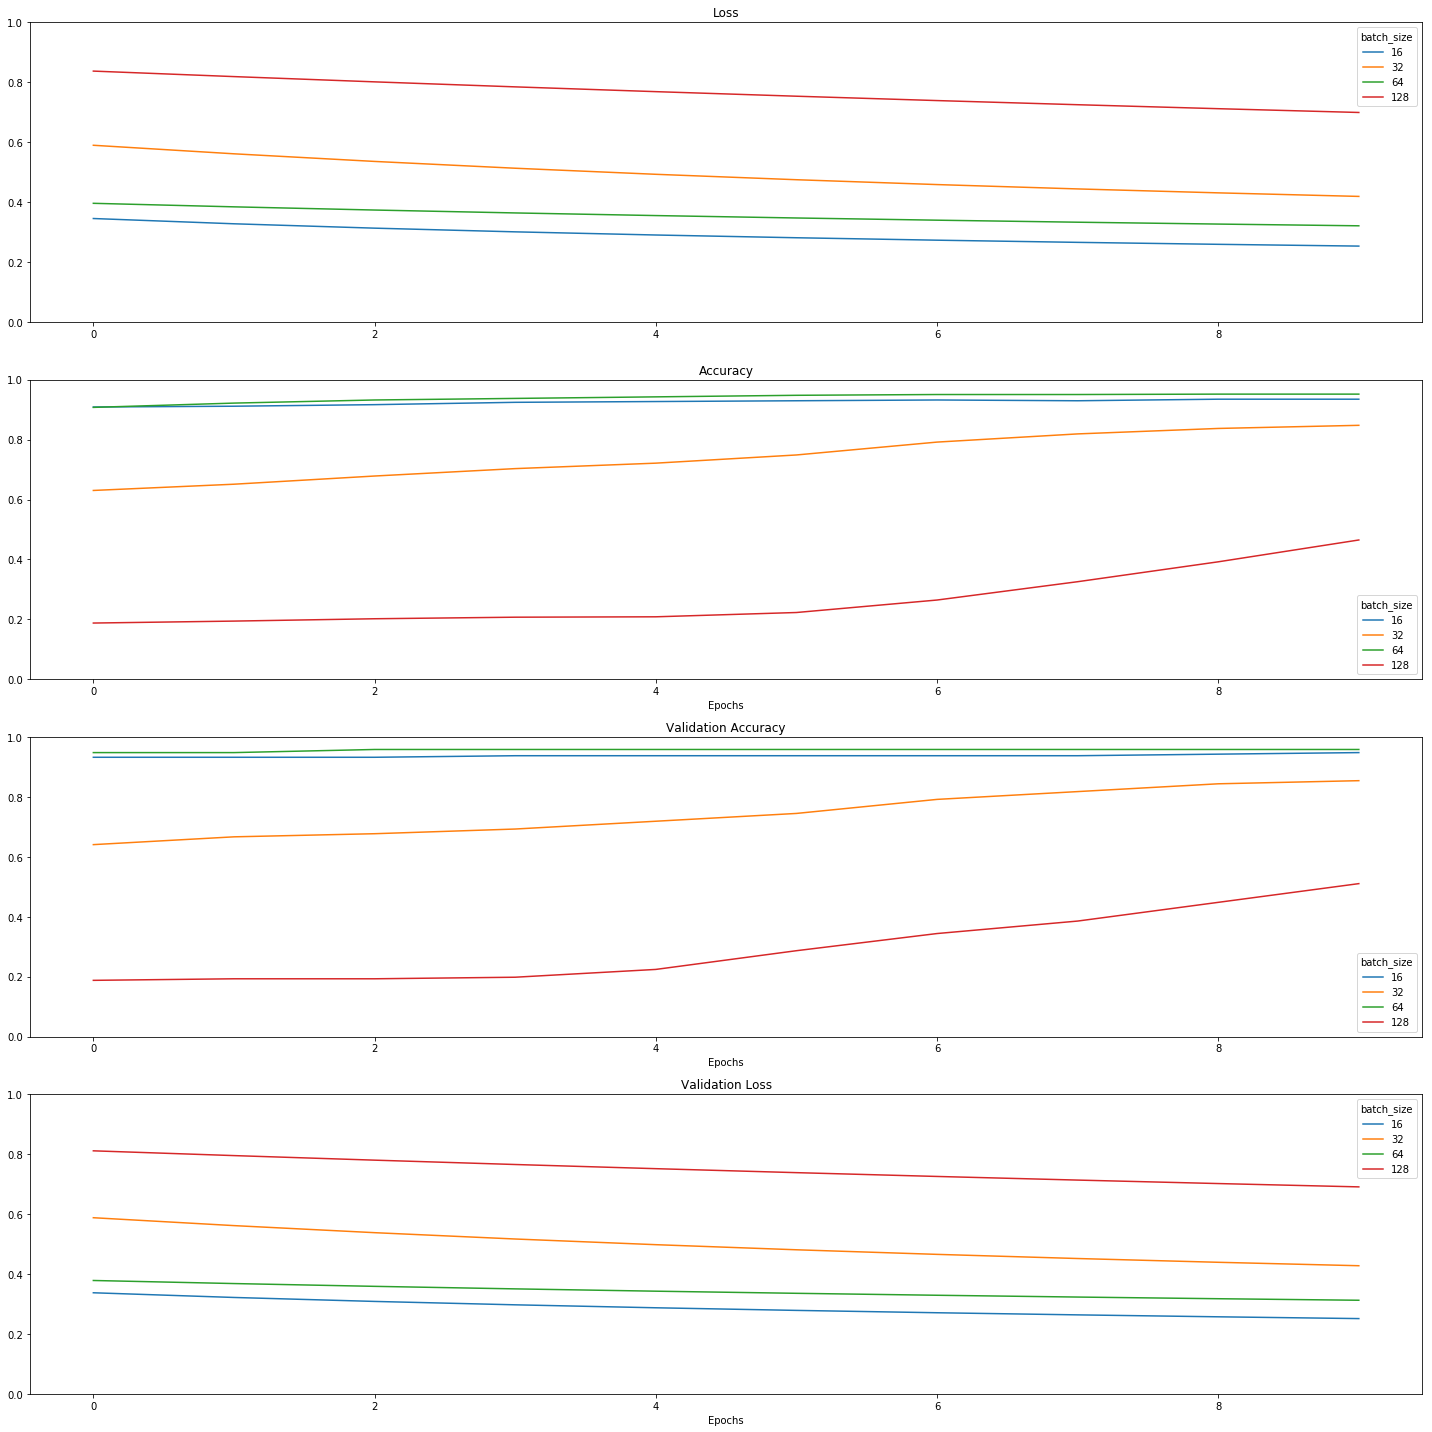

In [17]:
ax = plt.subplot(411)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax, figsize=(20,20))
plt.title("Loss")

ax = plt.subplot(412)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

ax = plt.subplot(413)
historydf.xs('val_acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Validation Accuracy")
plt.xlabel("Epochs")

ax = plt.subplot(414)
historydf.xs('val_loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Validation Loss")
plt.xlabel("Epochs")


plt.tight_layout()

In [18]:
for key, val in test_acc.items():
    print('Batch size %s - Test accuracy = %0.2f' % (key, val))

Batch size 16 - Test accuracy = 94.90
Batch size 32 - Test accuracy = 83.74
Batch size 64 - Test accuracy = 95.39
Batch size 128 - Test accuracy = 49.76


## Logistic Regression Model - Customize optimizer

### EWMA
- Exponentially weighted moving average
- Applied in Signal Processing, Time-series, Neural Network...
    + remove noises
    + smoothing signal
    + Apply to Optimizer in Neural network
$$s_t = ax_t + (1-a)s_{t-1}$$
    + a in range [0,1]
        - a small: prefer past(t-1) value
        - a large: prefer current value(t) value
        
- Example
<img src="Figs/10.jpg" alt="Drawing" style="width: 550px;"/>

## Optimizer
- Find the minimum cost value of a cost function by doing back propagation
<img src="Figs/11.jpg" alt="Drawing" style="width: 550px;"/>

### SGD
- Hyperparameter: 
    + learning rate $\epsilon$
- Notations:
    + $\widehat{g}$: Gradient estimate
    + $\theta$: weights
<img src="Figs/12.jpg" alt="Drawing" style="width: 550px;"/>

### SGD + Momentum
- Hyperparameter: 
    + learning rate $\epsilon$
    + momentum velocity v: Try to smoothen the gradient update, if moving toward the old direction -> move slowly
- Notations:
    + $\widehat{g}$: Gradient estimate
    + $\theta$: weights
<img src="Figs/13.jpg" alt="Drawing" style="width: 550px;"/>

### SGD + Nesterov Momentum
- Hyperparameter: 
    + learning rate $\epsilon$
    + momentum velocity v: Try to smoothen the gradient update, if moving toward the old direction -> move slowly
- Notations:
    + $\widehat{g}$: Gradient estimate
    + $\theta$: weights
- Different from SGD + Momentum
    + Update the gradient based on temporal momentum
    
<img src="Figs/14.jpg" alt="Drawing" style="width: 550px;"/>

### AdaGrad (Adaptive Algorithm - learning rate can change)
- Adaptive correction using Squared Gradien
<img src="Figs/15.jpg" alt="Drawing" style="width: 550px;"/>

### RMSprop (Adaptive Algorithm - learning rate can change)
- Apply EWNA to squared gradient AdaGrad
<img src="Figs/16.jpg" alt="Drawing" style="width: 550px;"/>

### Adam (Adaptive Algorithm - learning rate can change)
- Adaptive, Apply EWNA on 1st and 2nd moments
<img src="Figs/17.jpg" alt="Drawing" style="width: 550px;"/>

### Optimizers Summary
<img src="Figs/18.jpg" alt="Drawing" style="width: 550px;"/>


In [19]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

dflist = []
test_acc = {}

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:
    # model
    K.clear_session()
    
    model = Sequential()
    
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    
    # Train
    h = model.fit(
        X_train, y_train,
        epochs=10, validation_split=0.2,
        batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))
    
    # Test
    res = model.evaluate(X_test, y_test)
    test_acc[str(opt_name)] = res[1]*100

412/412 [==============================] - 0s 66us/step


In [20]:
historydf = pd.concat(dflist, axis=1)
display(historydf.head())

metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product(
    [optimizers, metrics_reported],
    names=['optimizer', 'metric'])

historydf.columns = idx
display(historydf.head())

,val_loss,val_acc,loss,acc,val_loss,val_acc,loss,acc,val_loss,val_acc,...,loss,acc,val_loss,val_acc,loss,acc,val_loss,val_acc,loss,acc
0,0.743728,0.546875,0.714004,0.591146,1.050325,0.192708,1.211581,0.194010,0.686210,0.630208,...,0.574784,0.690104,0.531332,0.822917,0.561456,0.755208,0.602370,0.677083,0.757061,0.535156
1,0.699877,0.572917,0.665593,0.641927,0.858714,0.364583,0.941124,0.325521,0.549040,0.895833,...,0.423780,0.832031,0.510510,0.838542,0.525785,0.808594,0.433526,0.875000,0.518483,0.743490
2,0.664075,0.593750,0.627742,0.675781,0.741326,0.453125,0.776032,0.485677,0.469607,0.973958,...,0.340649,0.885417,0.496177,0.848958,0.506261,0.833333,0.321791,0.973958,0.373764,0.915365
3,0.633829,0.635417,0.596787,0.695312,0.662517,0.541667,0.673715,0.578125,0.420537,0.947917,...,0.284367,0.914062,0.484942,0.854167,0.492057,0.845052,0.246806,0.979167,0.284124,0.959635
4,0.607592,0.656250,0.570721,0.708333,0.605461,0.640625,0.604742,0.648438,0.386872,0.942708,...,0.243586,0.921875,0.475569,0.880208,0.480702,0.851562,0.191135,0.979167,0.221806,0.955729


optimizer SGD(lr=0.01)                                \
metric        val_loss   val_acc      loss       acc   
0             0.743728  0.546875  0.714004  0.591146   
1             0.699877  0.572917  0.665593  0.641927   
2             0.664075  0.593750  0.627742  0.675781   
3             0.633829  0.635417  0.596787  0.695312   
4             0.607592  0.656250  0.570721  0.708333   

optimizer SGD(lr=0.01, momentum=0.3)                                \
metric                      val_loss   val_acc      loss       acc   
0                           1.050325  0.192708  1.211581  0.194010   
1                           0.858714  0.364583  0.941124  0.325521   
2                           0.741326  0.453125  0.776032  0.485677   
3                           0.662517  0.541667  0.673715  0.578125   
4                           0.605461  0.640625  0.604742  0.648438   

optimizer SGD(lr=0.01, momentum=0.3, nesterov=True)              ...     \
metric                                     val_loss   val_acc    ...      
0                                          0.686210  0.630208    ...      
1                                          0.549040  0.895833    ...      
2                                          0.469607  0.973958    ...      
3                                          0.420537  0.947917    ...      
4                                          0.386872  0.942708    ...      

optimizer Adam(lr=0.01)           Adagrad(lr=0.01)                      \
metric             loss       acc         val_loss   val_acc      loss   
0              0.574784  0.690104         0.531332  0.822917  0.561456   
1              0.423780  0.832031         0.510510  0.838542  0.525785   
2              0.340649  0.885417         0.496177  0.848958  0.506261   
3              0.284367  0.914062         0.484942  0.854167  0.492057   
4              0.243586  0.921875         0.475569  0.880208  0.480702   

optimizer           RMSprop(lr=0.01)                                
metric          acc         val_loss   val_acc      loss       acc  
0          0.755208         0.602370  0.677083  0.757061  0.535156  
1          0.808594         0.433526  0.875000  0.518483  0.743490  
2          0.833333         0.321791  0.973958  0.373764  0.915365  
3          0.845052         0.246806  0.979167  0.284124  0.959635  
4          0.851562         0.191135  0.979167  0.221806  0.955729  

[5 rows x 24 columns]

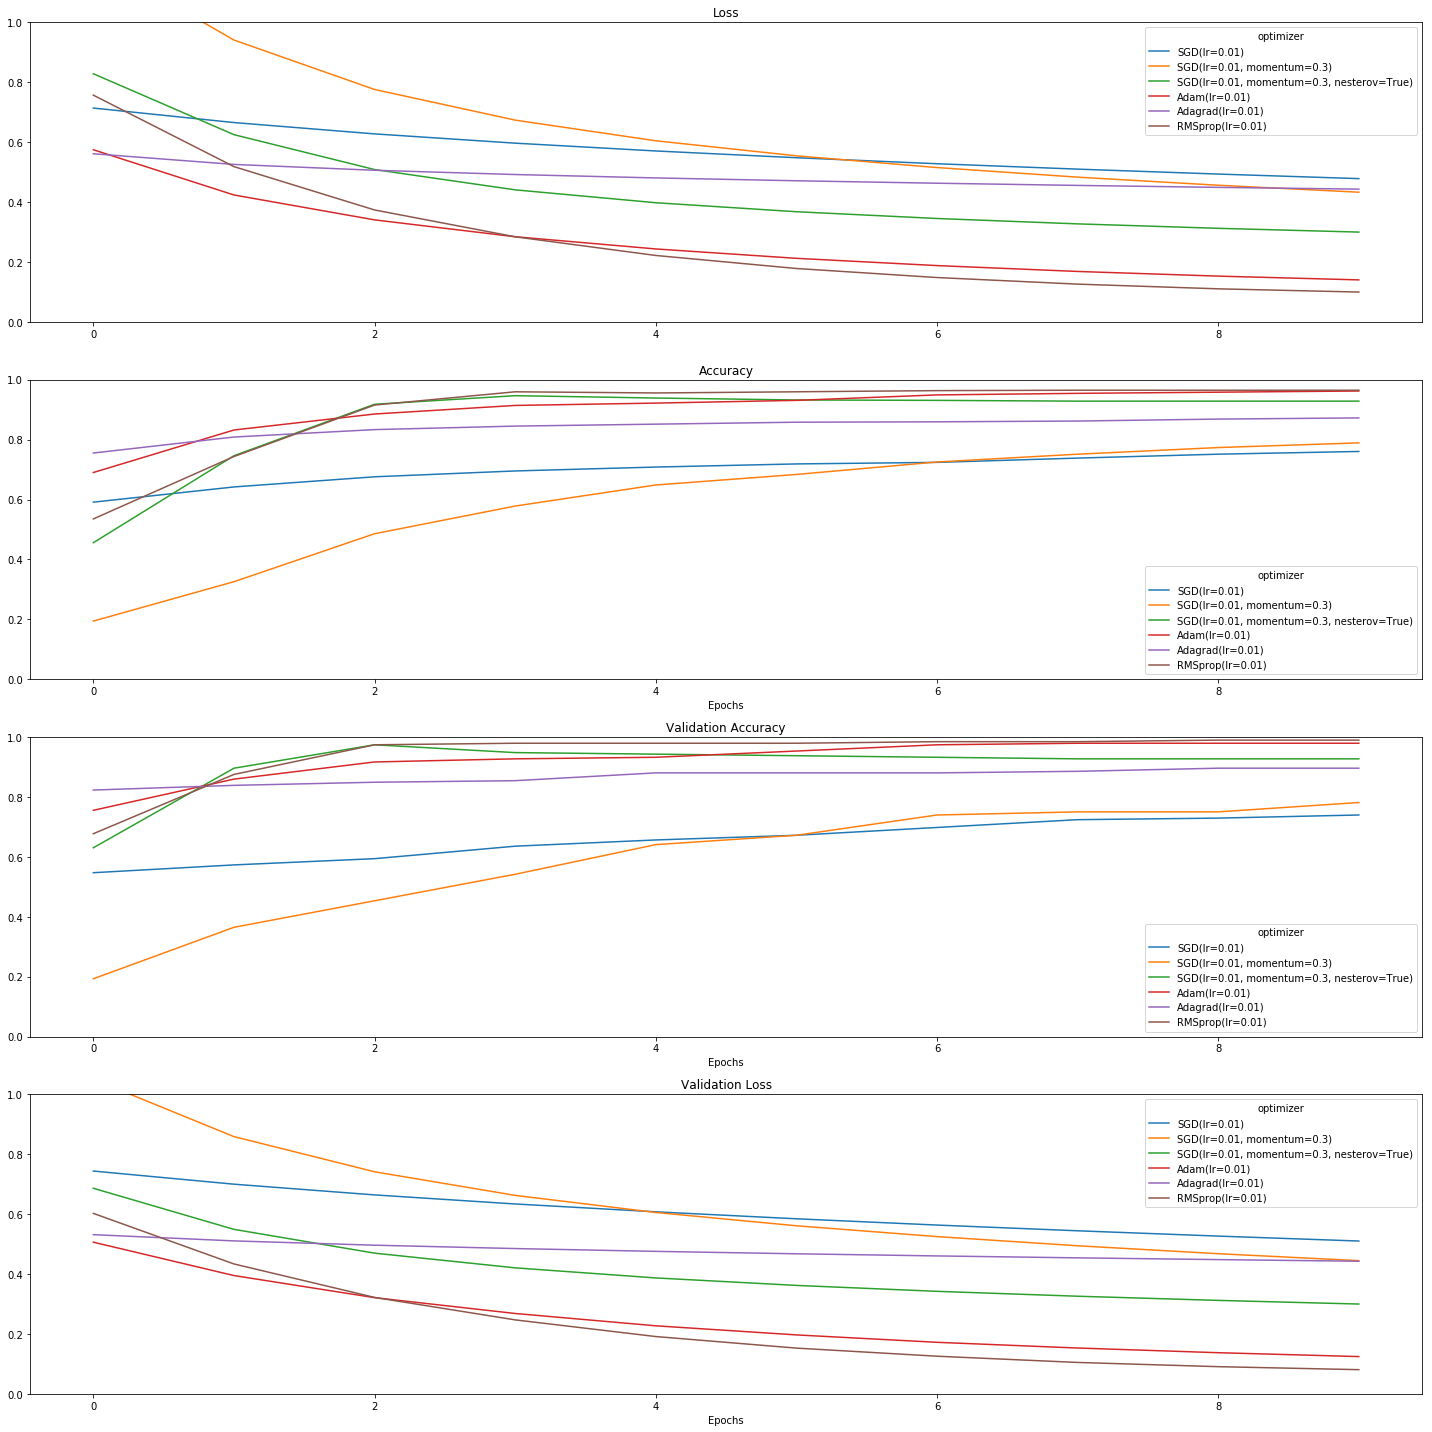

In [21]:
ax = plt.subplot(411)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax, figsize=(20,20))
plt.title("Loss")

ax = plt.subplot(412)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

ax = plt.subplot(413)
historydf.xs('val_acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Validation Accuracy")
plt.xlabel("Epochs")

ax = plt.subplot(414)
historydf.xs('val_loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Validation Loss")
plt.xlabel("Epochs")


plt.tight_layout()

In [22]:
for key, val in test_acc.items():
    print('Optimizer %s - Test accuracy = %0.2f' % (key, val))

Optimizer SGD(lr=0.01) - Test accuracy = 74.51
Optimizer SGD(lr=0.01, momentum=0.3) - Test accuracy = 76.46
Optimizer SGD(lr=0.01, momentum=0.3, nesterov=True) - Test accuracy = 92.96
Optimizer Adam(lr=0.01) - Test accuracy = 97.82
Optimizer Adagrad(lr=0.01) - Test accuracy = 87.14
Optimizer RMSprop(lr=0.01) - Test accuracy = 98.06


## Weight Initialization
- Neural Network work best when input normalized (mean=0, std=1)
- Initialize weights non-zero => better training

In [23]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']
test_acc = {}

for init in initializers:
    # model
    K.clear_session()

    model = Sequential()
    
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    # Train
    h = model.fit(
        X_train, y_train,
        validation_split=0.2,
        batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))
    
    # Test
    res = model.evaluate(X_test, y_test)
    test_acc[str(init)] = res[1]*100

412/412 [==============================] - 0s 23us/step


In [24]:
historydf = pd.concat(dflist, axis=1)
display(historydf.head())

metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product(
    [initializers, metrics_reported],
    names=['initializers', 'metric'])

historydf.columns = idx
display(historydf.head())

,val_loss,val_acc,loss,acc,val_loss,val_acc,loss,acc,val_loss,val_acc,loss,acc,val_loss,val_acc,loss,acc,val_loss,val_acc,loss,acc
0,0.662072,0.776042,0.673425,0.786458,0.650745,0.765625,0.661827,0.751302,0.668917,0.729167,0.680720,0.690104,1.440011,0.229167,1.544861,0.229167,0.600898,0.776042,0.624873,0.680990
1,0.638235,0.776042,0.644998,0.800781,0.627516,0.796875,0.634114,0.800781,0.644720,0.760417,0.651324,0.790365,1.385031,0.229167,1.480300,0.223958,0.577915,0.802083,0.596647,0.752604
2,0.616688,0.781250,0.619775,0.804688,0.606461,0.802083,0.609445,0.808594,0.622273,0.781250,0.625892,0.809896,1.332455,0.223958,1.420727,0.221354,0.555928,0.864583,0.570931,0.802083
3,0.595977,0.796875,0.596293,0.809896,0.586294,0.817708,0.586873,0.816406,0.601324,0.796875,0.601964,0.812500,1.282627,0.218750,1.362527,0.213542,0.535962,0.895833,0.547971,0.838542
4,0.577213,0.802083,0.575130,0.819010,0.567564,0.822917,0.565846,0.824219,0.581962,0.807292,0.579846,0.813802,1.230488,0.203125,1.304004,0.208333,0.516951,0.921875,0.526077,0.867188


initializers     zeros                                 uniform            \
metric        val_loss   val_acc      loss       acc  val_loss   val_acc   
0             0.662072  0.776042  0.673425  0.786458  0.650745  0.765625   
1             0.638235  0.776042  0.644998  0.800781  0.627516  0.796875   
2             0.616688  0.781250  0.619775  0.804688  0.606461  0.802083   
3             0.595977  0.796875  0.596293  0.809896  0.586294  0.817708   
4             0.577213  0.802083  0.575130  0.819010  0.567564  0.822917   

initializers                        normal                                \
metric            loss       acc  val_loss   val_acc      loss       acc   
0             0.661827  0.751302  0.668917  0.729167  0.680720  0.690104   
1             0.634114  0.800781  0.644720  0.760417  0.651324  0.790365   
2             0.609445  0.808594  0.622273  0.781250  0.625892  0.809896   
3             0.586873  0.816406  0.601324  0.796875  0.601964  0.812500   
4             0.565846  0.824219  0.581962  0.807292  0.579846  0.813802   

initializers he_normal                               lecun_uniform            \
metric        val_loss   val_acc      loss       acc      val_loss   val_acc   
0             1.440011  0.229167  1.544861  0.229167      0.600898  0.776042   
1             1.385031  0.229167  1.480300  0.223958      0.577915  0.802083   
2             1.332455  0.223958  1.420727  0.221354      0.555928  0.864583   
3             1.282627  0.218750  1.362527  0.213542      0.535962  0.895833   
4             1.230488  0.203125  1.304004  0.208333      0.516951  0.921875   

initializers                      
metric            loss       acc  
0             0.624873  0.680990  
1             0.596647  0.752604  
2             0.570931  0.802083  
3             0.547971  0.838542  
4             0.526077  0.867188

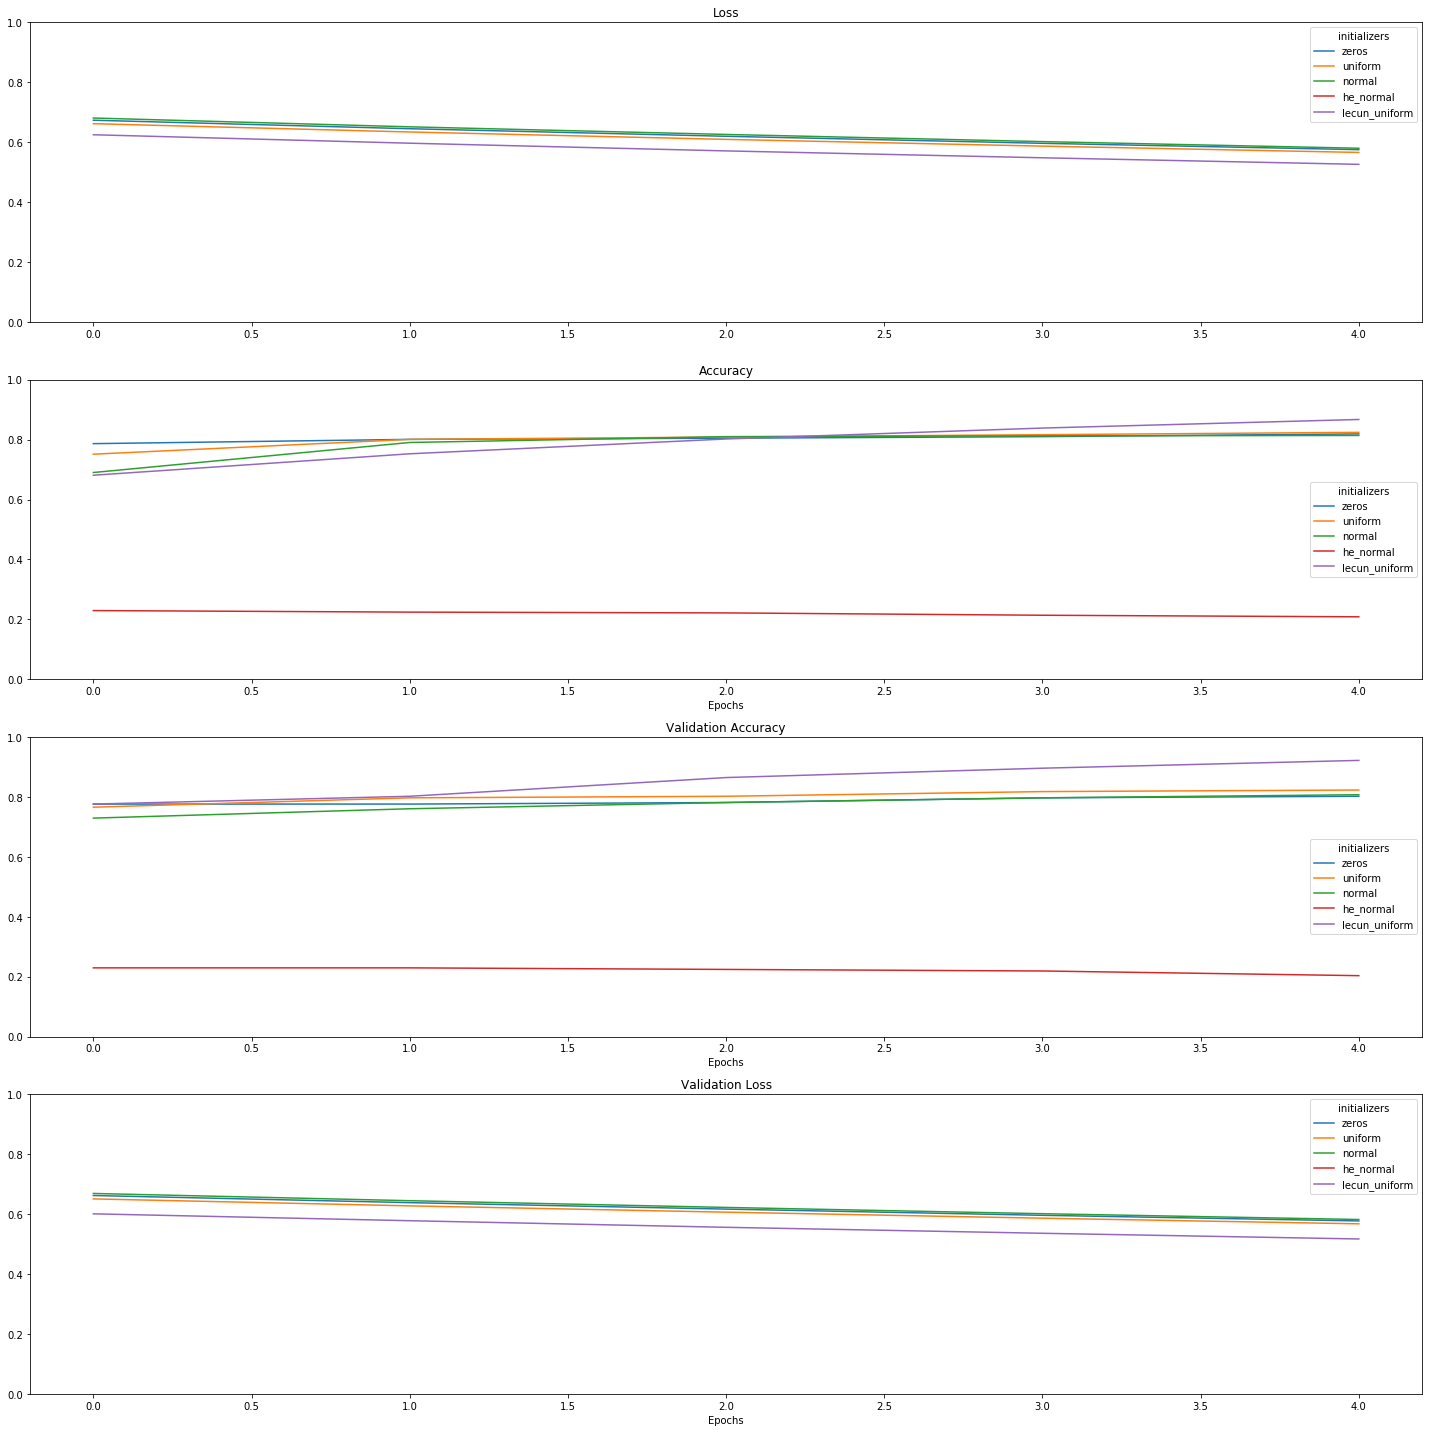

In [25]:
ax = plt.subplot(411)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax, figsize=(20,20))
plt.title("Loss")

ax = plt.subplot(412)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

ax = plt.subplot(413)
historydf.xs('val_acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Validation Accuracy")
plt.xlabel("Epochs")

ax = plt.subplot(414)
historydf.xs('val_loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Validation Loss")
plt.xlabel("Epochs")


plt.tight_layout()

In [26]:
for key, val in test_acc.items():
    print('Initiator %s - Test accuracy = %0.2f' % (key, val))

Initiator zeros - Test accuracy = 80.10
Initiator uniform - Test accuracy = 80.58
Initiator normal - Test accuracy = 81.07
Initiator he_normal - Test accuracy = 20.87
Initiator lecun_uniform - Test accuracy = 88.35
